# representation de la methode du gradient conjugue

In [ ]:
import numpy as np
import sympy as sp

# Fonction pour vérifier si la matrice est définie positive
def is_positive_definite(A):
    """
    Vérifie si une matrice est définie positive.
    """
    try:
        eigenvalues = np.linalg.eigvals(A)
        return np.all(eigenvalues > 0)
    except np.linalg.LinAlgError:
        return False  # La matrice n'est pas définie positive

# Nettoyage de l'expression
def clean_expression(expression):
    """
    Cette fonction nettoie l'expression en ajoutant des multiplications explicites là où nécessaire.
    Par exemple, "2x1^2" devient "2*x1**2".
    """
    expression = expression.replace('^', '**')
    expression = expression.replace('x', '*x')
    expression = expression.replace('*x', 'x')  # Correction du nettoyage
    return expression


# Fonction pour calculer le gradient de f
def gradient_f(f, x_vals, variables):
    """
    Calcul le gradient de la fonction f au point x_vals.
    """
    grad = []
    for var in variables:
        grad.append(sp.diff(f, var))
    grad_vals = [g.subs(dict(zip(variables, x_vals))) for g in grad]
    return np.array(grad_vals, dtype=float)


# Fonction pour calculer la Hessienne de f
def hessienne_f(f, variables):
    """
    Calcule la matrice Hessienne de la fonction f.
    """
    hess = np.zeros((len(variables), len(variables)))
    for i in range(len(variables)):
        for j in range(len(variables)):
            hess[i, j] = sp.diff(sp.diff(f, variables[i]), variables[j])
    return np.array(hess, dtype=float)


# Fonction du gradient conjugué
def gradient_conjugue_func(Q, b, x0, directions, f_expr, variables, tol=1e-8, max_iter=1000):
    """
    Résout le problème d'optimisation en utilisant la méthode du gradient conjugué.
    """
    x = np.array(x0, dtype=float)
    r = b - np.dot(Q, x)  # Calcul du gradient initial (résidu)
    rsold = np.dot(r.T, r)  # Calcul de r^T r

    k = 0
    while k < max_iter:
        # Utiliser la direction d(k)
        d = np.array(directions[k], dtype=float)  # Direction à l'itération k

        # Calcul du gradient à x(k)
        g = gradient_f(f_expr, x, variables)

        # Calcul de alpha(k) = -(g(k)^T * d(k)) / (d(k)^T Q d(k))
        Ap = np.dot(Q, d)  # Calcul de A * d
        alpha = -np.dot(g.T, d) / np.dot(d.T, Ap)

        # Mise à jour de la solution
        x = x + alpha * d  # Mise à jour avec la direction négative de la descente
        r = r + alpha * Ap  # Mise à jour du résidu

        rsnew = np.dot(r.T, r)  # Nouveau résidu
        g_new = gradient_f(f_expr, x, variables)  # Nouveau gradient
        if np.linalg.norm(g_new) < tol:  # Critère d'arrêt basé sur le gradient
            break  # Si le gradient est suffisamment proche de zéro, arrêter l'optimisation

        # Mise à jour de la direction d(k+1)
        beta = rsnew / rsold
        directions.append(r + beta * d)  # Calcul de la direction d(k+1)
        rsold = rsnew  # Mise à jour du résidu précédent
        k += 1

    return x, k + 1, g_new  # Retourner la solution, le nombre d'itérations et le gradient à la fin


# Fonction principale
if __name__ == "__main__":
    # Demander l'entrée utilisateur
    n = int(input("Combien de variables (dimension du vecteur) ? "))
    func_str = input("Entrez la fonction à optimiser (ex : 0.5*x1^2 + 2*x2^2 + x1 - x2) : ")
    func_str = clean_expression(func_str)

    # Calcul de A et b
    x = sp.symbols(f'x1:{n + 1}')
    f_expr = sp.sympify(func_str)
    grad_f = [sp.diff(f_expr, xi) for xi in x]

    A = hessienne_f(f_expr, x)
    b = np.array([-grad_f[i].subs({x[j]: 0 for j in range(n)}) for i in range(n)], dtype=float)

    # Vérification de A et b
    print("Matrice A:", A)
    print("Vecteur b:", b)

    # Vérifier si la matrice A est définie positive
    #print("Valeurs propres de A:", np.linalg.eigvals(A))

    x0 = list(map(float, input("Entrez les éléments de x0 (séparés par des espaces) : ").split()))
    x0 = np.array(x0)

    # Demander les directions à l'utilisateur
    directions_input = []
    for k in range(n):
        direction_input = list(map(float, input(f"Entrez la direction d({k}) (séparée par des espaces) : ").split()))
        directions_input.append(direction_input)

    # Vérification si A est définie positive
    if not is_positive_definite(A):
        print("La matrice A n'est pas définie positive, impossible de résoudre avec la méthode du gradient conjugué.")
    else:
        solution, num_iterations, final_gradient = gradient_conjugue_func(A, b, x0, directions_input, f_expr, x)
        print(f"\nLa solution trouvée est : {solution}")
        print(f"Le nombre d'itérations : {num_iterations}")
        print(f"Le gradient final g({num_iterations}) : {final_gradient}")

        # Calculer la valeur de la fonction à la solution
        f_value = f_expr.subs(dict(zip(x, solution)))
        print(f"La valeur de la fonction optimale à la solution trouvée est : {f_value}")



# resultat obtenu:
 - Combien de variables (dimension du vecteur) ?  2
 - Entrez la fonction à optimiser (ex : 0.5*x1^2 + 2*x2^2 + x1 - x2) :
 -   x1^2 + 2*x2^2 + x1 - x2 + 1
Matrice A: [[2. 0.][0. 4.]]

 - Vecteur b: [-1.  1.]
- Entrez les éléments de x0 (séparés par des espaces) :  0 0
- Entrez la direction d(0) (séparée par des espaces) :  1 0
- Entrez la direction d(1) (séparée par des espaces) :  0 1

- La solution trouvée est : [-0.5   0.25]
 - Le nombre d'itérations : 2
- Le gradient final g(2) : [0. 0.]
La valeur de la fonction optimale à la solution trouvée est : 0.62500000000000

# representation de la methode de newton

In [ ]:
import numpy as np
import sympy as sp


# Fonction pour calculer la Hessienne
def hessian(f, variables):
    """Calcul de la matrice Hessienne (la matrice des dérivées secondes)"""
    H = np.zeros((len(variables), len(variables)))
    for i in range(len(variables)):
        for j in range(len(variables)):
            H[i, j] = f.diff(variables[i], variables[j])
    return H


# Fonction pour afficher l'inverse de la Hessienne
def hessian_inverse(f, x0):
    # Calcul des variables symboliques
    variables = sp.symbols(f'x1:{len(x0) + 1}')

    # Calcul de la Hessienne de la fonction
    H_f = hessian(f, variables)

    # Conversion de la Hessienne en fonction numérique
    H_f_func = np.array(
        [[sp.lambdify(variables, H_f[i, j], 'numpy') for j in range(len(variables))] for i in range(len(variables))])

    # Calcul de la Hessienne à x0
    H = np.array([[hf(*x0) for hf in H_f_func[i]] for i in range(len(H_f_func))])

    # Calcul de l'inverse de la Hessienne
    try:
        H_inv = np.linalg.inv(H)
        return H_inv
    except np.linalg.LinAlgError:
        return None  # Si la Hessienne est singulière, retourner None


# Fonction principale pour la méthode de Newton
def newton_method(f, x0, tol=1e-8, max_iter=100):
    # Calcul des variables symboliques
    variables = sp.symbols(f'x1:{len(x0) + 1}')
    grad_f = [sp.diff(f, var) for var in variables]  # Calcul du gradient
    H_f = hessian(f, variables)  # Calcul de la Hessienne

    # Conversion de f, gradient et Hessienne en fonctions numériques
    grad_f_func = [sp.lambdify(variables, grad, 'numpy') for grad in grad_f]
    H_f_func = np.array(
        [[sp.lambdify(variables, H_f[i, j], 'numpy') for j in range(len(variables))] for i in range(len(variables))])

    # Initialisation
    x = np.array(x0, dtype=float)
    for k in range(max_iter):
        grad = np.array([gf(*x) for gf in grad_f_func])  # Calcul du gradient
        H = np.array([[hf(*x) for hf in H_f_func[i]] for i in range(len(H_f_func))])  # Calcul de la Hessienne

        # Résolution du système pour la mise à jour de x
        try:
            H_inv = np.linalg.inv(H)  # Inverse de la Hessienne
            x_new = x - np.dot(H_inv, grad)
        except np.linalg.LinAlgError:
            print(f"La Hessienne est singulière à l'itération {k}. Impossible de calculer l'inverse.")
            return x, k, None, None

        # Vérification du critère d'arrêt
        if np.linalg.norm(x_new - x) < tol:
            # Calcul de la valeur de la fonction à la solution optimale
            f_opt = f.subs({variables[i]: x_new[i] for i in range(len(x0))})
            return x_new, k + 1, f_opt, H_inv  # Retourner la solution, le nombre d'itérations, la valeur de la fonction et l'inverse de la Hessienne

        x = x_new  # Mise à jour de x pour la prochaine itération

    # Si nous atteignons max_iter sans convergence
    f_opt = f.subs({variables[i]: x[i] for i in range(len(x0))})
    return x, max_iter, f_opt, H_inv


# Exemple d'utilisation
if __name__ == "__main__":
    # Demander la fonction à optimiser
    func_str = input("Entrez la fonction à optimiser (par exemple : x1^2 + 2*x2^2 + x1 - x2) : ")
    func_str = func_str.replace('^', '**')  # Assurer la compatibilité de la syntaxe avec sympy
    f = sp.sympify(func_str)

    # Point initial
    x0 = list(map(float, input("Entrez les éléments du point initial x0 (séparés par des espaces) : ").split()))



    # Appel de la méthode de Newton
    solution, num_iterations, f_opt, H_inv_final = newton_method(f, x0)

    # Affichage des résultats
    print(f"\nLa solution trouvée est : {solution}")
    print(f"Le nombre d'itérations : {num_iterations}")
    print(f"La valeur de la fonction optimale à la solution trouvée est : {f_opt}")


## resultat obtenu 

- Entrez la fonction à optimiser (par exemple : x1^2 + 2*x2^2 + x1 - x2) :  8*x1^2 - 4*x1*x2 + 5*x2^2
- Entrez les éléments du point initial x0 (séparés par des espaces) :  5 2

- La solution trouvée est : [0. 0.]
- Le nombre d'itérations : 2
- La valeur de la fonction optimale à la solution trouvée est : 0


# representation de la methode de steepest

In [25]:
import sympy as sp
import numpy as np


def gradient_descent(f, a0, b0, max_iter=1000, tol=1e-6):
    """
    Descente de gradient avec calcul automatique du gradient une seule fois.
    
    Arguments :
        f : Fonction sympy à minimiser (symbolique).
        a0, b0 : Valeurs initiales pour a et b.
        max_iter : Nombre maximum d'itérations.
        tol : Tolérance pour l'arrêt.

    Retourne :
        a_opt, b_opt : Valeurs optimisées pour a et b.
        f_opt : Valeur minimale de la fonction.
    """
    # Définition des variables symboliques
    a, b = sp.symbols('a b')
    
    # Conversion de la fonction symbolique en fonction numérique
    f_func = sp.lambdify((a, b), f, 'numpy')
    
    # Calcul du gradient symbolique
    grad = [sp.diff(f, var) for var in (a, b)]
    grad_func = sp.lambdify((a, b), grad, 'numpy')
    
    # Initialisation
    a_val, b_val = a0, b0
    prev_value = f_func(a_val, b_val)  # Valeur initiale de la fonction

    for i in range(max_iter):
        # Calcul du gradient au point actuel
        grad_val = np.array(grad_func(a_val, b_val), dtype=float)
        
        # Vérification si le gradient est proche de zéro (condition d'arrêt)
        if np.linalg.norm(grad_val) < tol:
            break
        
        # Recherche linéaire pour trouver le pas optimal
        alpha = line_search(f_func, grad_val, a_val, b_val)
        
        # Mise à jour des variables
        a_val -= alpha * grad_val[0]
        b_val -= alpha * grad_val[1]
        
        # Calcul de la nouvelle valeur de la fonction
        current_value = f_func(a_val, b_val)
        
        # Condition de convergence
        if abs(current_value - prev_value) < tol:
            break
        
        prev_value = current_value  # Mise à jour de la valeur précédente
    
    return float(a_val), float(b_val), float(f_func(a_val, b_val))


def line_search(f_func, grad, a, b, tau=0.9, max_iter=50):
    """
    Recherche linéaire simple pour le pas optimal.
    
    Arguments :
        f_func : Fonction numérique.
        grad : Gradient au point actuel.
        a, b : Coordonnées actuelles.
        tau : Facteur de réduction du pas (entre 0 et 1).
        max_iter : Limite pour éviter une boucle infinie.
    
    Retourne :
        alpha : Pas optimal pour la mise à jour.
    """
    alpha = 1.0
    direction = (-grad[0], -grad[1])  # Direction de descente
    
    for _ in range(max_iter):
        # Vérifie si la condition de décroissance est respectée
        if f_func(a + alpha * direction[0], b + alpha * direction[1]) < f_func(a, b):
            return alpha
        alpha *= tau  # Réduit le pas
    
    return alpha  # Retourne le dernier pas trouvé


def main():
    """
    Interface utilisateur simplifiée pour l'entrée des données
    et l'exécution de l'algorithme.
    """
    print("Descente de Gradient Automatique")
    
    # Entrée utilisateur pour la fonction
    expr_input = input("Entrez la fonction à minimiser (ex : (a - 2)**2 + (b + 3)**2) : ")
    a, b = sp.symbols('a b')
    
    try:
        # Transformation de l'expression en fonction symbolique
        f = sp.sympify(expr_input)
    except Exception as e:
        print(f"Erreur dans la définition de la fonction : {e}")
        return
    
    try:
        # Points initiaux
        a0 = float(input("Valeur initiale de a : "))
        b0 = float(input("Valeur initiale de b : "))
    except ValueError:
        print("Veuillez entrer des valeurs numériques valides.")
        return
    
    # Exécution de la descente de gradient
    try:
        a_opt, b_opt, f_opt = gradient_descent(f, a0, b0)
        print(f"\nLes valeurs optimisées sont : a = {a_opt:.4f}, b = {b_opt:.4f}")
        print(f"Valeur minimale de f : {f_opt:.4f}")
    except Exception as e:
        print(f"Une erreur s'est produite lors de l'optimisation : {e}")


if __name__ == "__main__":
    main()


Descente de Gradient Automatique


Entrez la fonction à minimiser (ex : (a - 2)**2 + (b + 3)**2) :  a**2 + b**2 +2*b + 4
Valeur initiale de a :  2.1
Valeur initiale de b :  3.2



Les valeurs optimisées sont : a = -0.8602, b = -2.7203
Valeur minimale de f : 6.6994


Descente de Gradient Automatique


Entrez la fonction à minimiser (ex : (a - 2)**2 + (b + 3)**2) :  a**2 + b**2 + 2*b + 4
Valeur initiale de a :  2.1
Valeur initiale de b :  3.2



Les valeurs optimisées sont : a = -0.8602, b = -2.7203
Valeur minimale de f : 6.6994


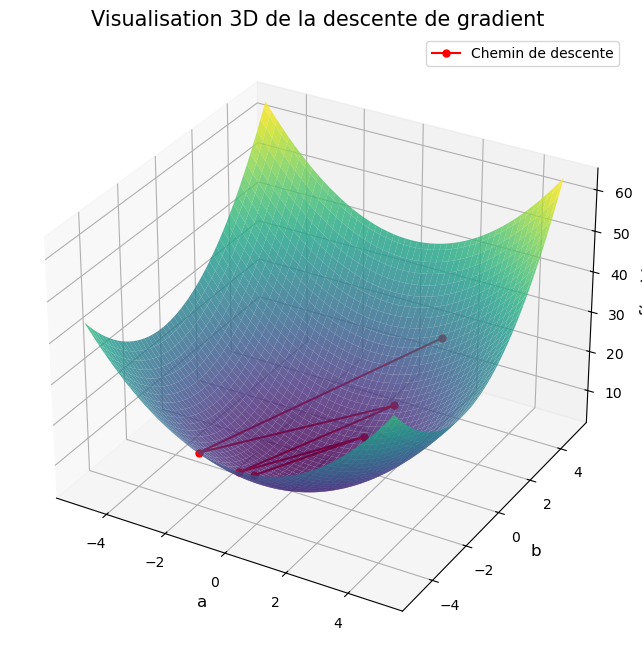

In [29]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_descent(f, a0, b0, max_iter=1000, tol=1e-6):
    """
    Descente de gradient avec calcul automatique du gradient.
    
    Arguments :
        f : Fonction sympy à minimiser (symbolique).
        a0, b0 : Valeurs initiales pour a et b.
        max_iter : Nombre maximum d'itérations.
        tol : Tolérance pour l'arrêt.

    Retourne :
        a_opt, b_opt : Valeurs optimisées pour a et b.
        f_opt : Valeur minimale de la fonction.
        history : Liste des positions (a, b) visitées.
    """
    # Définition des variables symboliques
    a, b = sp.symbols('a b')
    
    # Conversion de la fonction symbolique en fonction numérique
    f_func = sp.lambdify((a, b), f, 'numpy')
    
    # Calcul du gradient symbolique
    grad = [sp.diff(f, var) for var in (a, b)]
    grad_func = sp.lambdify((a, b), grad, 'numpy')
    
    # Initialisation
    a_val, b_val = a0, b0
    prev_value = f_func(a_val, b_val)
    history = [(a_val, b_val)]  # Historique des positions

    for i in range(max_iter):
        grad_val = np.array(grad_func(a_val, b_val), dtype=float)
        if np.linalg.norm(grad_val) < tol:  # Arrêt si gradient proche de zéro
            break
        alpha = line_search(f_func, grad_val, a_val, b_val)
        a_val -= alpha * grad_val[0]
        b_val -= alpha * grad_val[1]
        current_value = f_func(a_val, b_val)
        history.append((a_val, b_val))  # Ajouter la nouvelle position
        if abs(current_value - prev_value) < tol:  # Convergence
            break
        prev_value = current_value
    
    return float(a_val), float(b_val), float(f_func(a_val, b_val)), history


def line_search(f_func, grad, a, b, tau=0.9, max_iter=50):
    alpha = 1.0
    direction = (-grad[0], -grad[1])
    for _ in range(max_iter):
        if f_func(a + alpha * direction[0], b + alpha * direction[1]) < f_func(a, b):
            return alpha
        alpha *= tau
    return alpha


def plot_3d(f, history):
    """
    Génère une visualisation 3D de la fonction et du chemin suivi par la descente de gradient.
    
    Arguments :
        f : Fonction sympy à minimiser.
        history : Liste des positions visitées.
    """
    a, b = sp.symbols('a b')
    f_func = sp.lambdify((a, b), f, 'numpy')
    
    # Création de la grille
    a_vals = np.linspace(-5, 5, 100)
    b_vals = np.linspace(-5, 5, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    F = f_func(A, B)
    
    # Tracé de la surface
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(A, B, F, cmap='viridis', alpha=0.8, edgecolor='none')
    
    # Tracé du chemin suivi par la descente de gradient
    path = np.array(history)
    z_vals = [f_func(a, b) for a, b in path]
    ax.plot(path[:, 0], path[:, 1], z_vals, color='red', marker='o', markersize=5, label='Chemin de descente')
    
    # Configuration des axes
    ax.set_title("Visualisation 3D de la descente de gradient", fontsize=15)
    ax.set_xlabel('a', fontsize=12)
    ax.set_ylabel('b', fontsize=12)
    ax.set_zlabel('f(a, b)', fontsize=12)
    ax.legend()
    plt.show()


def main():
    print("Descente de Gradient Automatique")
    
    expr_input = input("Entrez la fonction à minimiser (ex : (a - 2)**2 + (b + 3)**2) : ")
    a, b = sp.symbols('a b')
    
    try:
        f = sp.sympify(expr_input)
    except Exception as e:
        print(f"Erreur dans la définition de la fonction : {e}")
        return
    
    try:
        a0 = float(input("Valeur initiale de a : "))
        b0 = float(input("Valeur initiale de b : "))
    except ValueError:
        print("Veuillez entrer des valeurs numériques valides.")
        return
    
    try:
        a_opt, b_opt, f_opt, history = gradient_descent(f, a0, b0)
        print(f"\nLes valeurs optimisées sont : a = {a_opt:.4f}, b = {b_opt:.4f}")
        print(f"Valeur minimale de f : {f_opt:.4f}")
        
        # Visualisation
        plot_3d(f, history)
    except Exception as e:
        print(f"Une erreur s'est produite lors de l'optimisation : {e}")


if __name__ == "__main__":
    main()
